# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as lt
import os
import cv2
from tensorflow.keras.preprocessing import image


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [19]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32
)

class_name = validation_set.class_names
print(class_name)  # Print class names to verify


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [20]:
print(os.listdir())  # Lists all files in the current directory


['.venv', 'archive', 'home_page.jpeg', 'main.py', 'myenv', 'my_env', 'requirement.txt', 'test', 'Test_plant_disease copy.ipynb', 'Test_plant_disease.ipynb', 'train', 'trained_plant_disease_model.keras', 'training_hist.json', 'Train_plant_disease.ipynb', 'valid']


# Loading Model

#Visualising and Performing Prediction on Single image

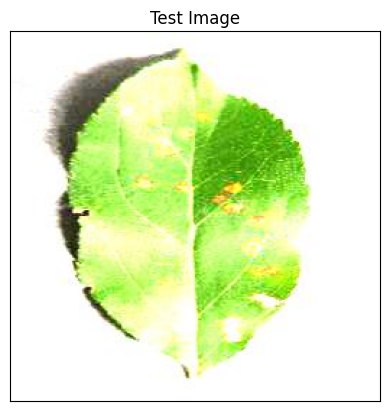

In [21]:
image_path = 'test/test/AppleCedarRust1.JPG'

# Read image using OpenCV
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [22]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_name), activation='softmax')  # Adjust based on number of classes
])

cnn.summary()  # Print model summary


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,334 (49.37 MB)

 Trainable params: 12,943,334 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

## Testing Model

In [23]:
image_path = 'test/test/AppleCedarRust1.JPG'

# Load image and resize to match CNN input shape
img = image.load_img(image_path, target_size=(128, 128))
input_arr = image.img_to_array(img)  # Convert to array
input_arr = np.expand_dims(input_arr, axis=0)  # Add batch dimension

# Normalize input (optional, depends on training preprocessing)
input_arr = input_arr / 255.0  # Rescale pixel values to [0,1]

# Make prediction
predictions = cnn.predict(input_arr)
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
[[0.02517199 0.02480012 0.01800059 0.02539515 0.02728397 0.02149668
  0.02782079 0.03319023 0.02674435 0.025377   0.02847655 0.02758941
  0.02282107 0.02867777 0.02112197 0.02397302 0.03432092 0.02418643
  0.02807299 0.02987688 0.0286986  0.02695143 0.02751242 0.0260365
  0.03099952 0.02250913 0.02976353 0.0262158  0.02322834 0.0271303
  0.0320182  0.02928847 0.02354341 0.02387228 0.02306597 0.02761889
  0.020648   0.02650127]]


Predicted Class Index: 16


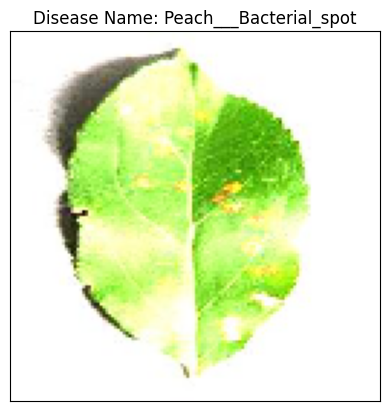

In [24]:
result_index = np.argmax(predictions)  # Get class index
print(f"Predicted Class Index: {result_index}")

# Ensure index does not exceed class list length
if result_index < len(class_name):
    model_prediction = class_name[result_index]
else:
    model_prediction = "Unknown"

# Display image with prediction result
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [25]:
cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,334 (49.37 MB)

 Trainable params: 12,943,334 (49.37 MB)

 Non-trainable params: 0 (0.00 B)